<a href="https://colab.research.google.com/github/Bearodriguez2022/FastApi_PI1/blob/master/ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INGIENERIA DE DATOS.

Modelo ML sistema de recomendación basado en Vecinos Cercanos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [50]:
df1 = pd.read_csv('/content/drive/MyDrive/PI_1.2/Data1.2/df1.csv')

In [ ]:
df1.head(2)

In [ ]:
df1.info()

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
#analizo df1
report = sv.analyze(df1)


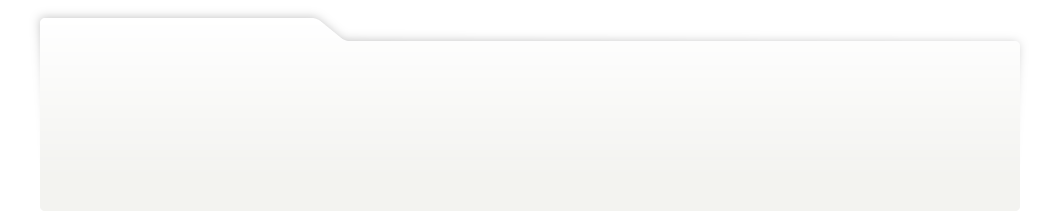
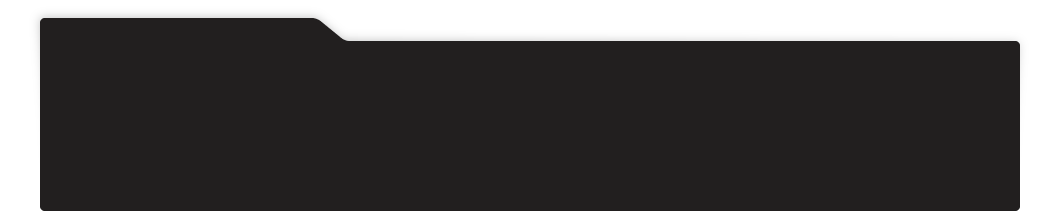
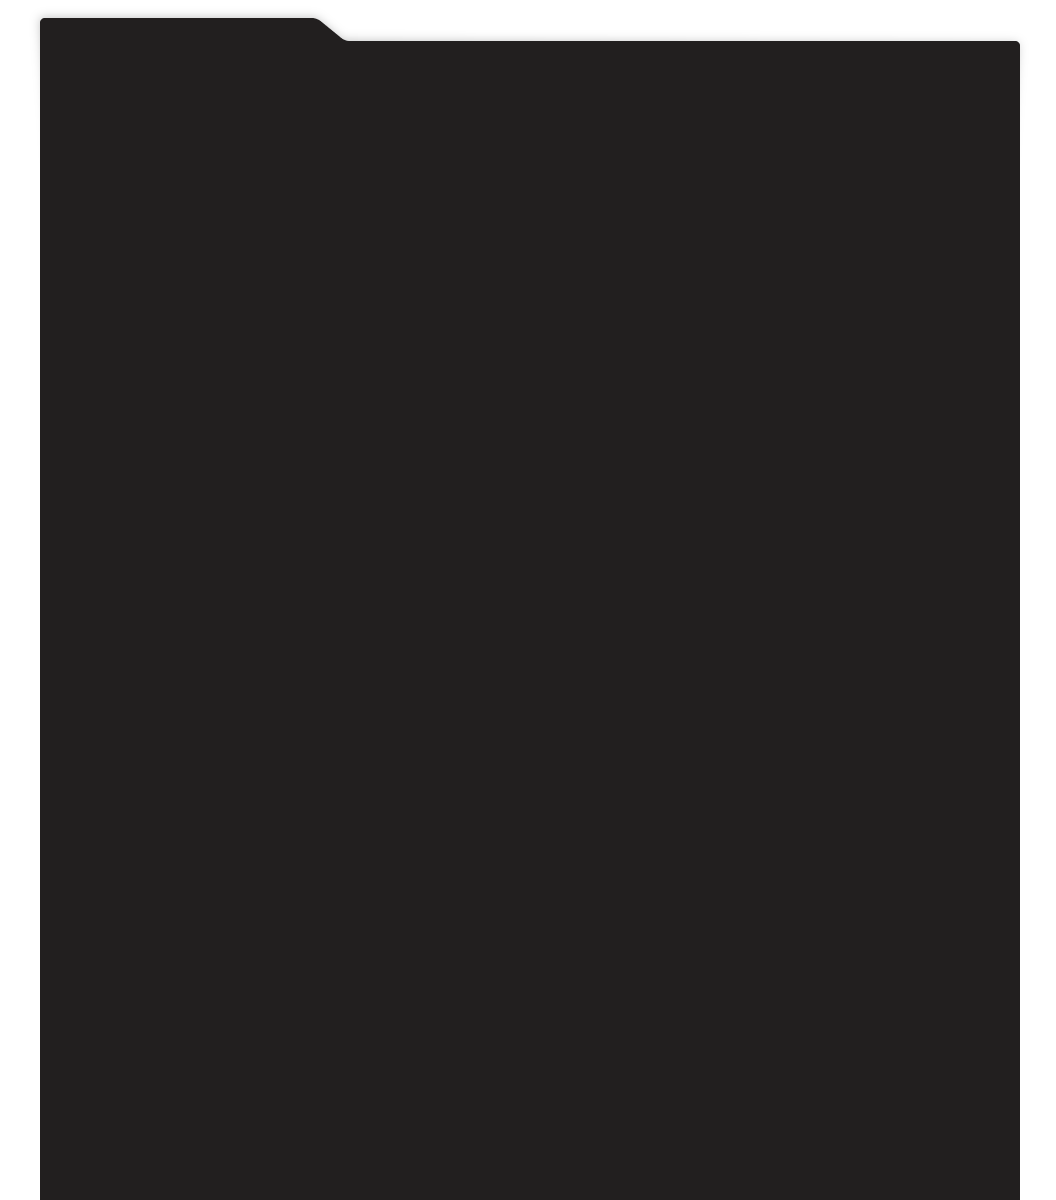
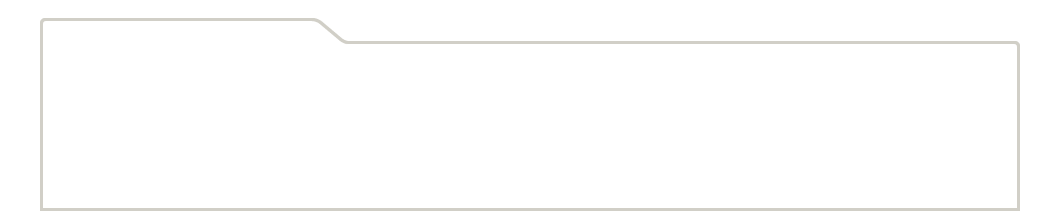
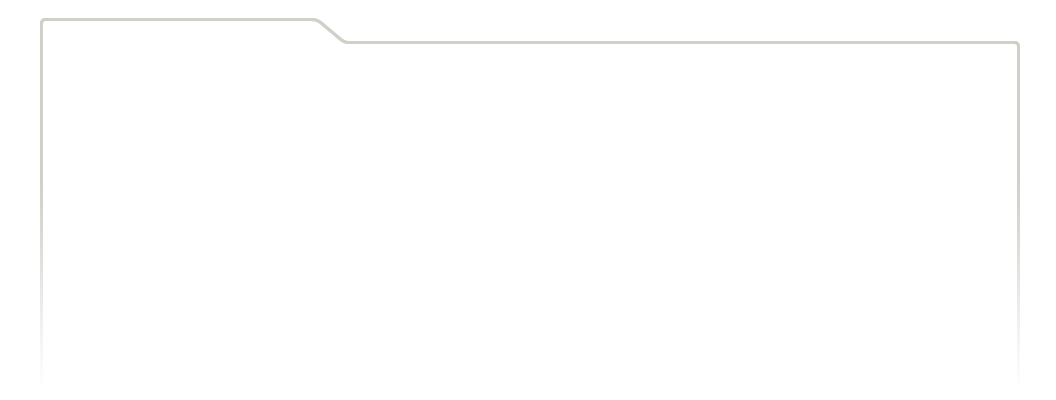
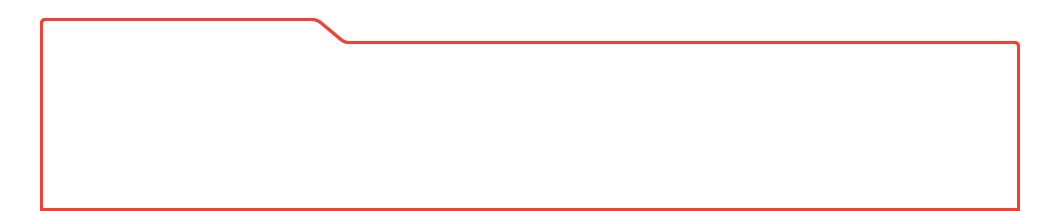
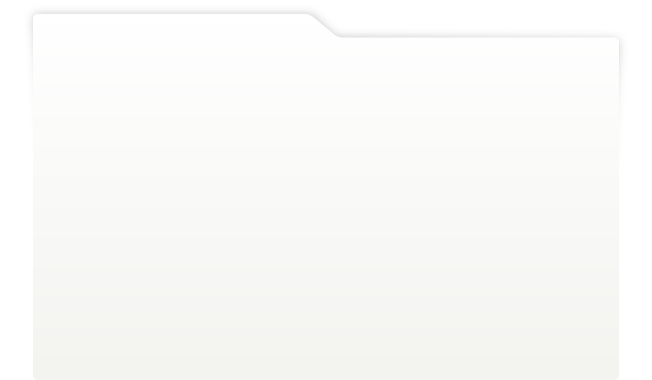
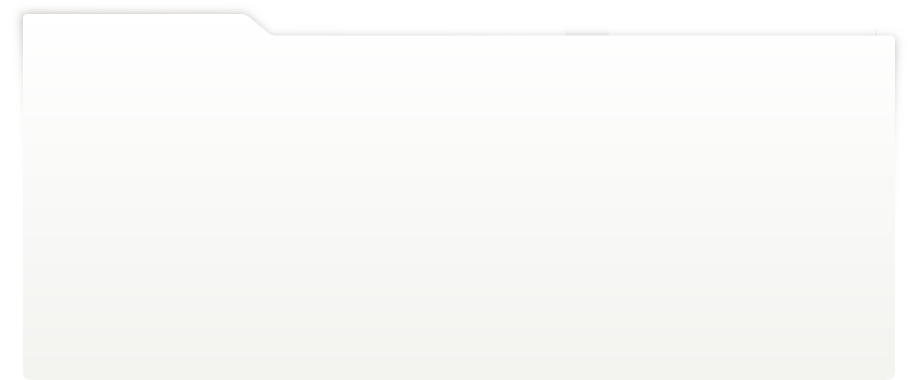
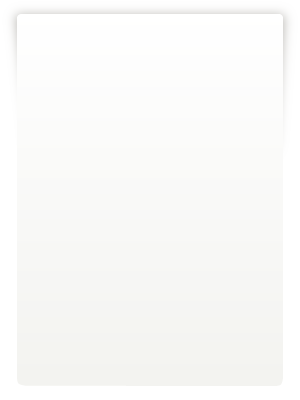
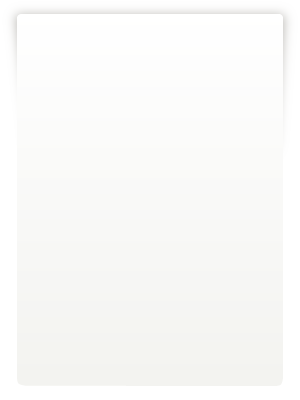
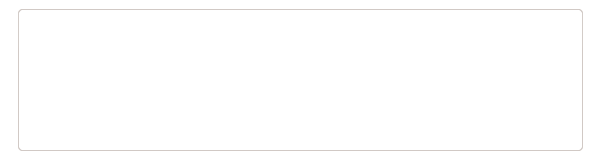
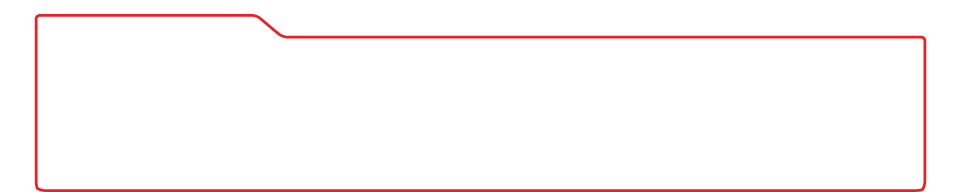
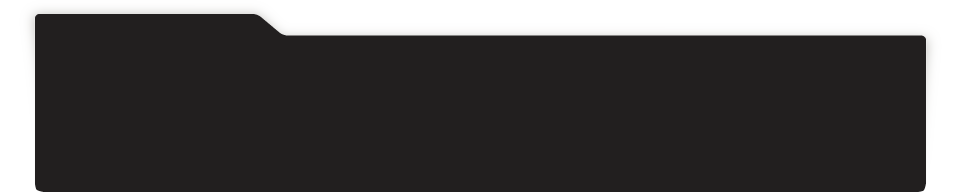
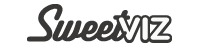
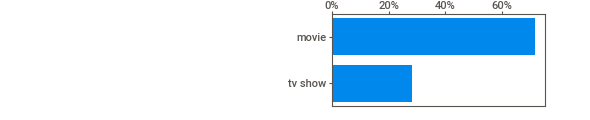
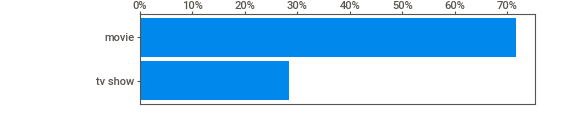
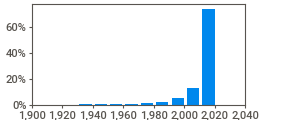
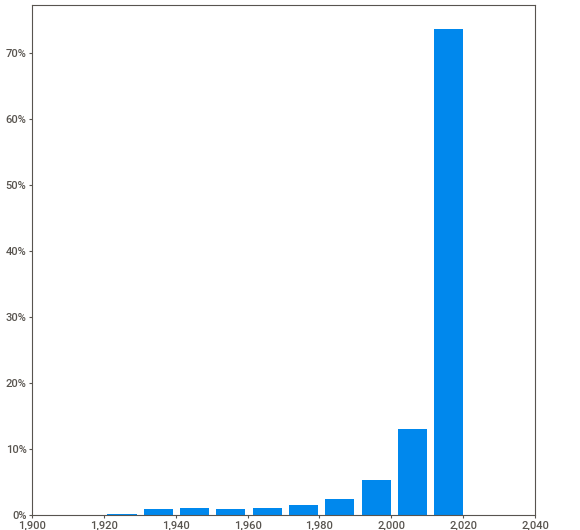
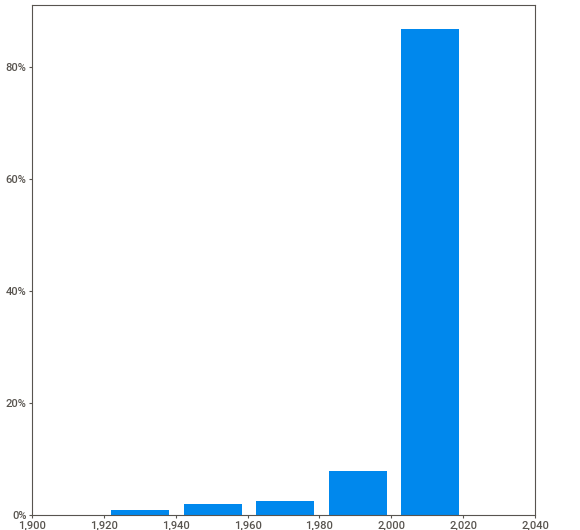
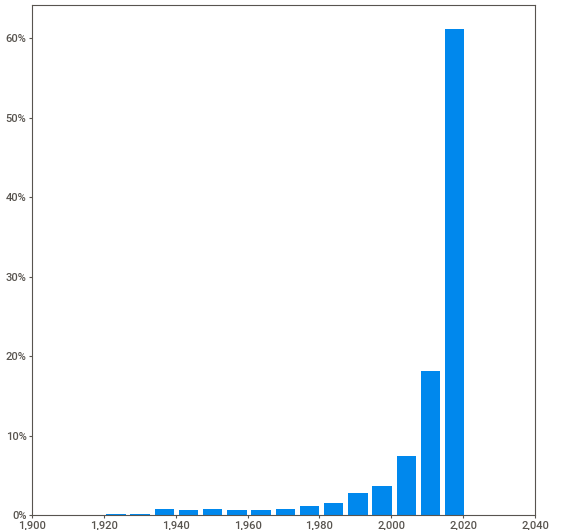
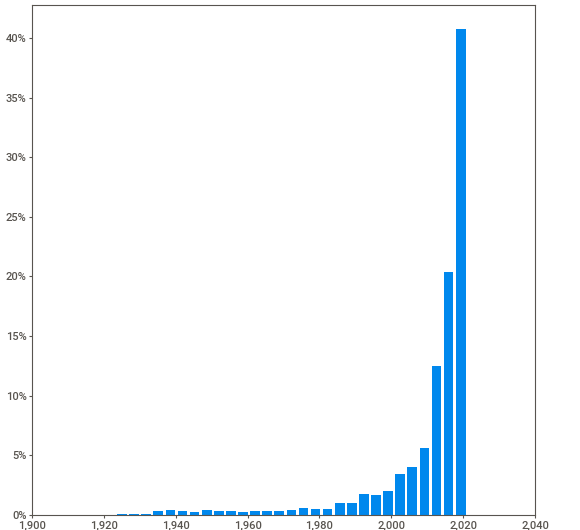
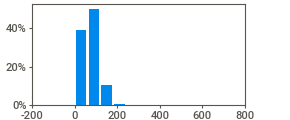
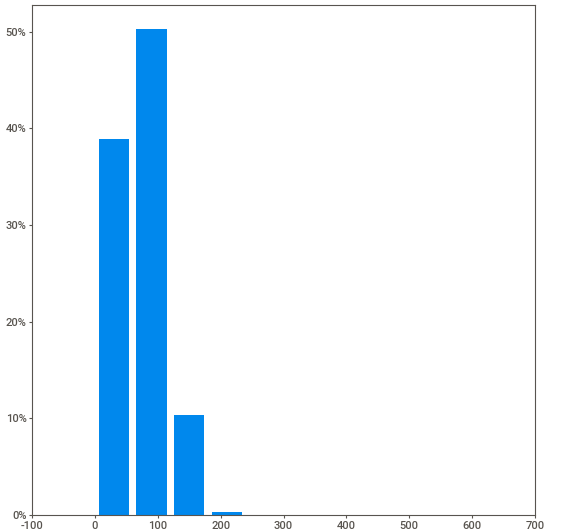
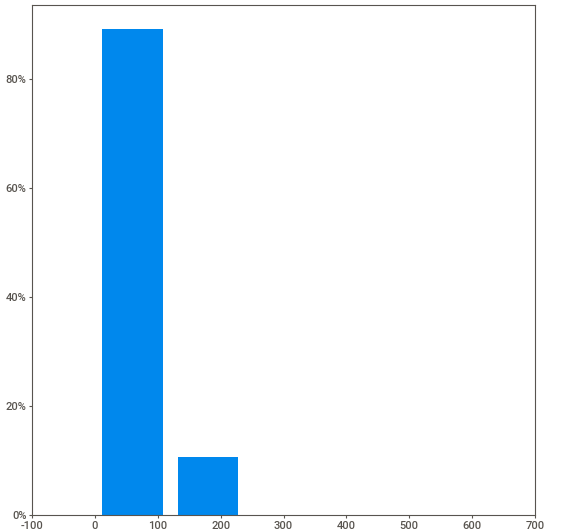
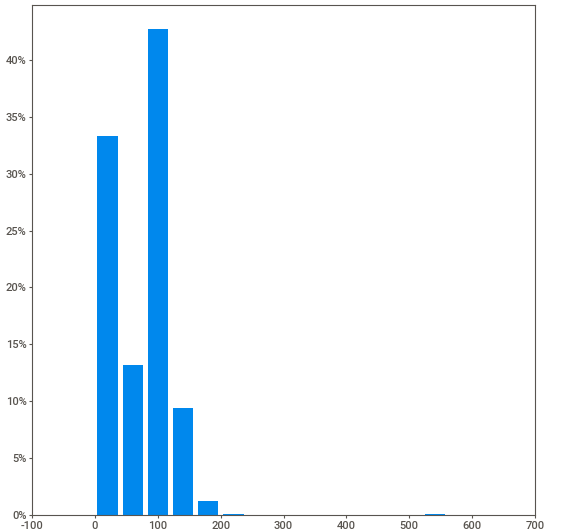
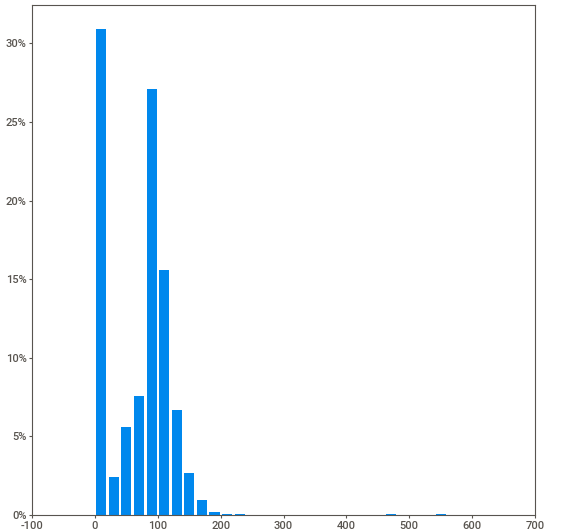
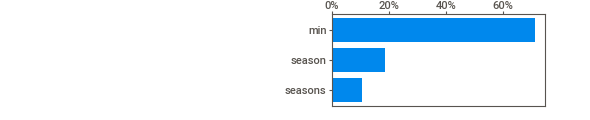
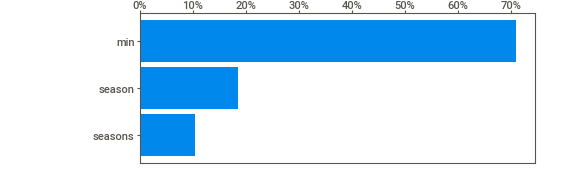
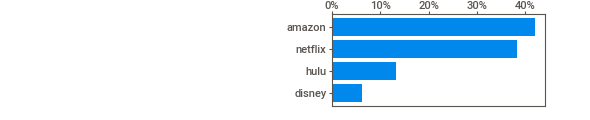
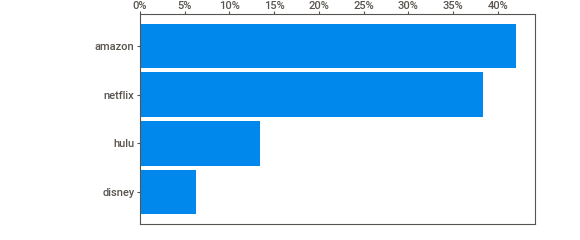
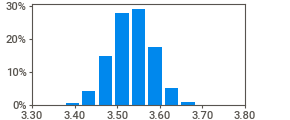
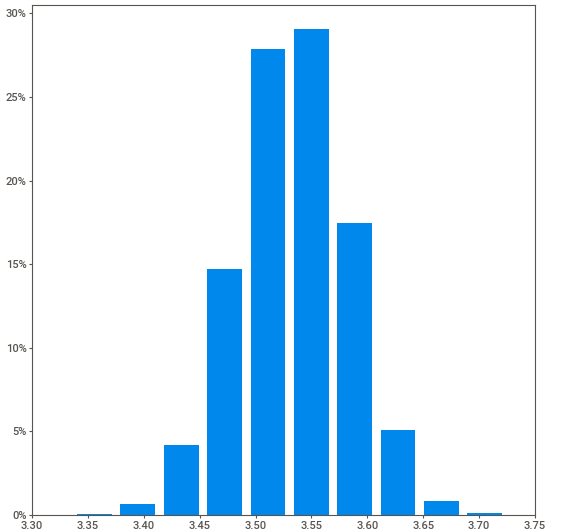
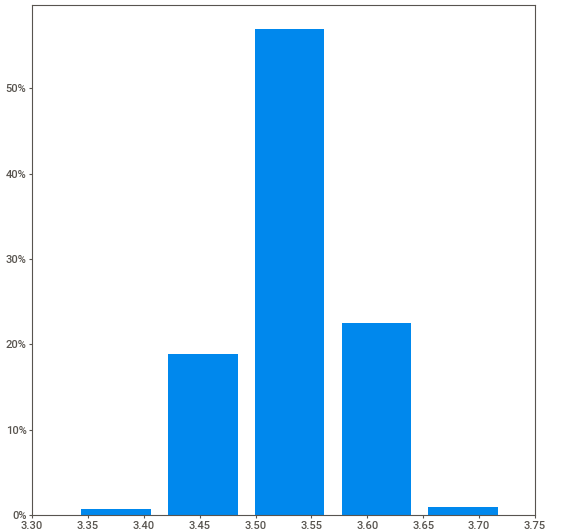
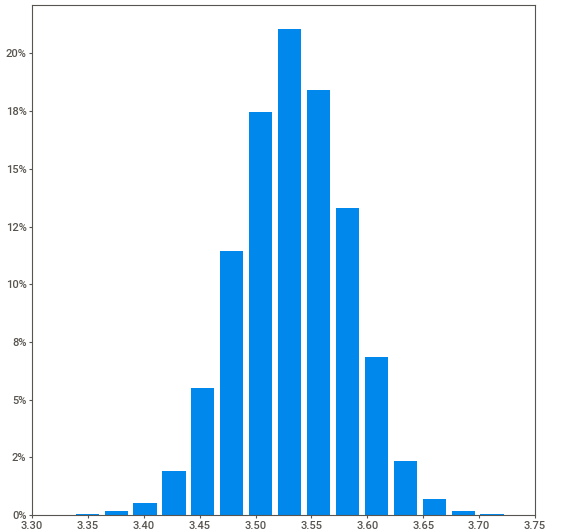
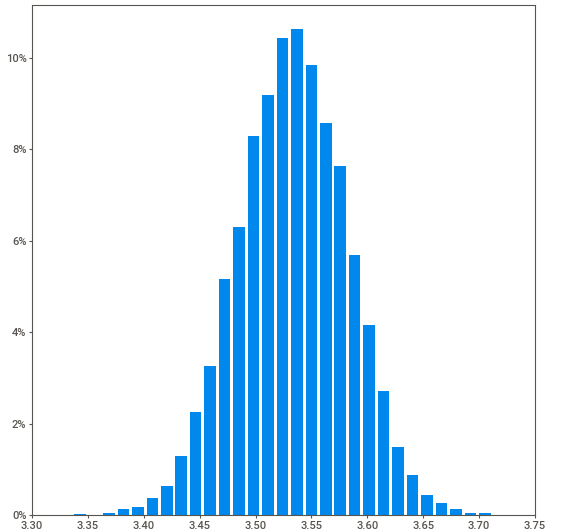
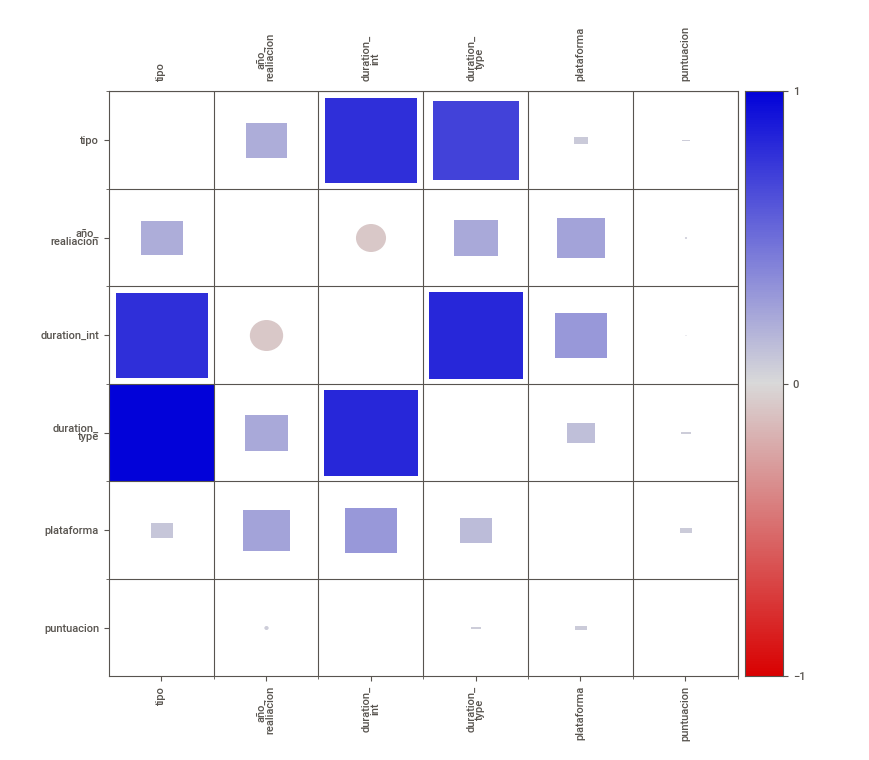
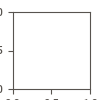

In [ ]:
report.show_notebook()

In [ ]:
!pip install pandas-profiling[notebook]

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df1, title='Pandas Profiling Report')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Para realizar un modelo de machine learning hay que:


1.   Normalización de datos( ajustar los valores de una variable para que estén dentro de un rango específico),  ajustar los valores de una variable para que estén dentro de un rango específico. Codificación de variables categóricas:  como la codificación de etiquetas, la codificación one-hot(preprocesamiento)
2.  Entreno.
3.  Calculo efectividad del mismo.
4.  Realizo Modelo de Predicción para ser usado en la Api.





In [ ]:
#voy a necesitar columna elenco, titulo, puntuacion 

In [57]:
#paso a numericas las columnas elenco y titulo para que sea mas facil modelar
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['elenco_encoded'] = le.fit_transform(df1['elenco']) 
df1['titulo_encoded'] = le.fit_transform(df1['titulo'])


In [58]:
#normalizo datos
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)

In [59]:
features_mean = ['titulo_encoded', 'elenco_encoded', 'puntuacion']
df_train = df1[features_mean]


In [60]:
#divido los datos  selecciono 20% para entrenar y lo otro para testear
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
X = df_train[['titulo_encoded', 'puntuacion','elenco_encoded']]
y = df_train[ 'puntuacion']

In [62]:
#Entreno el modelo
from sklearn.neighbors import KNeighborsRegressor
k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [63]:
#calculo la efectiidad del modelo, que resulta ser 0.053
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [64]:
#formula para probar en consulta de Api
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from typing import List
X = df1[['titulo_encoded', 'puntuacion', 'elenco_encoded']].values

# Escalar los datos
scl = StandardScaler()
X = scl.fit_transform(X)

# Entrenar el modelo de vecinos cercanos
knn_model = NearestNeighbors(metric='cosine', algorithm='auto')
knn_model.fit(X)

NearestNeighbors(metric='cosine')

In [65]:
#Sistema de recomendación
def get_recommendations(peliculas):
    # Obtener el índice de la película seleccionada
    idx = df1[df1['titulo'] == peliculas].index[0]

    # Obtener los vecinos cercanos a la película seleccionada
    distances, indices = knn_model.kneighbors(X[idx].reshape(1, -1), n_neighbors=6)

    # Obtener los títulos de las películas recomendadas
    recommended_movies = df1.iloc[indices[0][1:]]['titulo'].tolist()

    return recommended_movies

In [66]:
get_recommendations('zoom')

['the small one',
 'urvi',
 'three words to forever',
 'the last hour',
 'woody woodpecker']